In [24]:
import pandas as pd
data = pd.read_excel('PM10.xlsx')
day = []
for i in range(1,1097):
    day.append(i)
data['DAY'] = day
data.head()

,PM10,PM2.5,Tempreature,Humid,Wind Speed,Wind Direction,Pressure,RainFall,DAY
0,88,37.0,18.9,16.375,3.125,290,857.675,0.0,1
1,52,21.0,17.0,17.500,2.250,280,857.388,0.0,2
2,51,23.0,17.2,14.500,1.125,240,858.737,0.0,3
3,158,56.0,19.6,15.875,1.000,190,860.950,0.0,4
4,112,43.0,21.3,12.875,2.125,290,860.688,0.0,5


In [25]:
X = data[['PM10','Tempreature','Humid','Wind Speed','Wind Direction','Pressure','RainFall','DAY']]
X = X.values
Y = data['PM2.5']
Y = Y.values

In [26]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 = train_test_split(X,Y ,test_size=0.2,random_state=0)

In [48]:
import keras
from keras.layers import Dense
from keras.models import Sequential
model = Sequential()
model.add(Dense(50, activation='relu', input_dim=8))
model.add(Dense(50,activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [49]:
model.fit(x_train1, y_train1, epochs=2000,batch_size=len(x_train1), verbose=0)

In [50]:
model.evaluate(x_test1,y_test1)

7/7 [==============================] - 0s 3ms/step - loss: 53.3939


53.39392852783203

In [14]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
y_pred2030 = model.predict(x_test1)
mse2030 = mean_squared_error(y_test1, y_pred2030)
mae2030 = mean_absolute_error(y_test1, y_pred2030)
rmse2030 = math.sqrt(mse2030)
print('mse : %.3f'%mse2030)
print('rmse : %.3f'%rmse2030)
print('mae : %.3f'%mae2030)

mse : 45.221
rmse : 6.725
mae : 4.747


# Load data

In [19]:
from keras.models import model_from_json
json_file = open('MLP_model_6_btar.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("mlp_model_6_btar.h5")
print("Loaded model from disk")

Loaded model from disk


In [21]:
loaded_model.compile(loss='mse', optimizer='rmsprop')


In [22]:
loaded_model.evaluate(x_test1,y_test1)

7/7 [==============================] - 0s 3ms/step - loss: 44.6430


37.654754638671875

In [23]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
y_pred2030 = loaded_model.predict(x_test1)
mse2030 = mean_squared_error(y_test1, y_pred2030)
mae2030 = mean_absolute_error(y_test1, y_pred2030)
rmse2030 = math.sqrt(mse2030)
print('mse : %.3f'%mse2030)
print('rmse : %.3f'%rmse2030)
print('mae : %.3f'%mae2030)

mse : 37.655
rmse : 6.136
mae : 4.352


(10, 180)

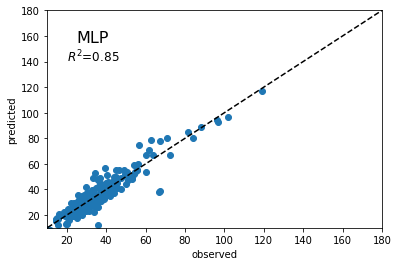

In [100]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, r2_score
plt.scatter(y_pred2030, y_test1)
plt.plot([0, 250], [0, 250], '--k')
plt.ylabel('predicted')
plt.xlabel('observed')
plt.text(25,155,'MLP',fontsize=16)
plt.text(20,140, r'$R^2$=%.2f'% (
       r2_score(y_pred2030, y_test1)),fontsize=12)
plt.xlim([10, 180])
plt.ylim([10, 180])